In [1]:
# Let's make sure Keras is installed
import sys
!{sys.executable} -m pip install keras > /dev/null
import matplotlib.pyplot as plt
import numpy as np

You are using pip version 10.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


# Introduction
In this initial example we just create a classifier to recognize handwritten digits from the famous mnist dataset. Typically the training data is referred to as **X**, the training lables as **y**, and the test data and labesl as **X_test** and **y_test** respectively. Let's load the train/test data, and show one of the images with the help of the excellent matplotlib library:

Using TensorFlow backend.


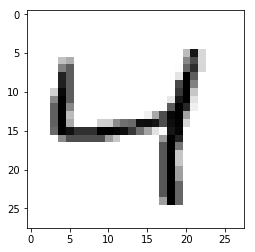

In [2]:
import keras.datasets as datasets

(X, y),  (X_test, y_test) = datasets.mnist.load_data()
digit = X[2]
plt.imshow(digit, cmap=plt.cm.binary)

Let's now define the network, which basically has one input layer, one hidden layer using *relu* and an output layer with 10 units that uses 'softmax' so that we get the probablity of the image being each of the 10 digits.

In [3]:
from keras import models
from keras import layers


net = models.Sequential()
net.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
net.add(layers.Dense(10, activation='softmax'))

Next we need a *loss function* and an *optimizer* that will take care of driving the actual learning.

In [4]:
net.compile(optimizer='rmsprop',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

Our images are curently matrices, but the input to the network requires a vector, so we need to reshape them. This is made easy by the use of Numpy. We also normalize the values between $[0, 1]$.

In [5]:
X = X.reshape((len(X), 28 * 28)).astype('float32') / 255
X_test = X_test.reshape((len(X_test), 28 * 28)).astype('float32') / 255

Next we need to deal with the labels. They are current a number from 0 to 10, but their numerical value is irrelevant for the network, so we use the **one-hot-encoding** technique. This will transform the 10 categories into 10 new features, for which each sample will only have one of them with a value of 1 and the others will be 0. For instance, the number 3 will have the *3* column set to 1, and the other ones to 0.

In [6]:
from keras.utils import to_categorical

y = to_categorical(y)
y_test = to_categorical(y_test)

We are now ready to train the network

In [7]:
net.reset_states()
net.fit(X, y, epochs=5, batch_size=256)
net.evaluate(X_test, y_test)

Epoch 1/5
60000/60000 [==============================] - 2s 32us/step - loss: 0.3117 - acc: 0.9100
Epoch 2/5
60000/60000 [==============================] - 2s 30us/step - loss: 0.1325 - acc: 0.9611
Epoch 3/5
60000/60000 [==============================] - 2s 30us/step - loss: 0.0879 - acc: 0.9747
Epoch 4/5
60000/60000 [==============================] - 2s 30us/step - loss: 0.0632 - acc: 0.9814
Epoch 5/5
10000/10000 [==============================] - 0s 29us/step


[0.07383332406086847, 0.977]

Let's try to classify a few images now. You'll see the results are actually pretty good.

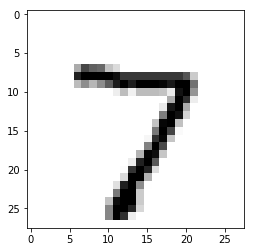

7


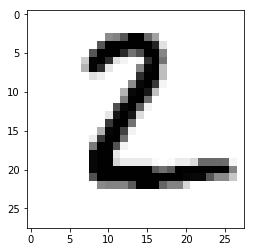

2


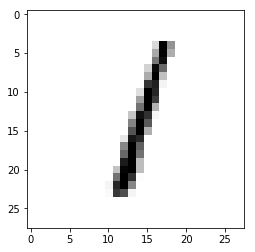

1


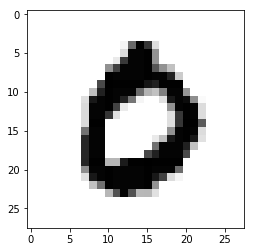

0


In [8]:
# Get the test images again, so that we can display them. Remember
# that X_test is reshaped and is not a matrix anymore
(_, _), (images, _) = datasets.mnist.load_data()

for i in range(0, 4):
    # Draw the current image
    digit = images[i]
    plt.imshow(digit, cmap=plt.cm.binary)
    plt.show()
    
    # This step is tricky. Because we trained using batches the 
    # network expects inputs to have the following shape (batch, image_vector)
    # so to predict on a single image, we have to add a "fake" dimention on the
    # left.
    X_pred = np.expand_dims(X_test[i], axis=0)
    pred = net.predict(X_pred)
    # Let's print the value with the highest probability
    print(pred.argmax())
